In [1]:
%%bash
pip install kaggle

  Running setup.py bdist_wheel for kaggle: started
  Running setup.py bdist_wheel for kaggle: finished with status 'done'
  Stored in directory: /home/ec2-user/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
  Running setup.py bdist_wheel for python-slugify: started
  Running setup.py bdist_wheel for python-slugify: finished with status 'done'
  Stored in directory: /home/ec2-user/.cache/pip/wheels/11/94/81/312969455540cb0e6a773e5d68a73c14128bfdfd4a7969bb4f
Successfully built kaggle python-slugify


You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [22]:
%%bash 
mkdir /home/ec2-user/.kaggle/
mv /home/ec2-user/SageMaker/kaggle.json /home/ec2-user/.kaggle/
chmod 600 /home/ec2-user/.kaggle/kaggle.json

In [23]:
%%bash

kaggle datasets list --user paultimothymooney

Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/envs/mxnet_p36/bin/kaggle", line 11, in <module>
    sys.exit(main())
  File "/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/kaggle/cli.py", line 51, in main
    out = args.func(**command_args)
  File "/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/kaggle/api/kaggle_api_extended.py", line 940, in dataset_list_cli
    max_size, min_size)
  File "/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/kaggle/api/kaggle_api_extended.py", line 905, in dataset_list
    return [Dataset(d) for d in datasets_list_result]
  File "/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/kaggle/api/kaggle_api_extended.py", line 905, in <listcomp>
    return [Dataset(d) for d in datasets_list_result]
  File "/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/kaggle/models/kaggle_models_extended.py", line 67, in __init__
    self.size = File.get_size(

In [26]:
!ls

breast-cancer-detection-image-preprocessing.ipynb  lost+found
breast-histopathology-images.zip


In [24]:
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
allen-institute-for-ai/CORD-19-research-challenge              COVID-19 Open Research Dataset Challenge (CORD-19)  729MB  2020-03-27 23:46:53          39787       4656  0.88235295       
ryanxjhan/cbc-news-coronavirus-articles-march-26               CBC News Coronavirus/COVID-19 Articles (NLP)          6MB  2020-03-27 23:23:07            122         21  1.0              
danevans/world-bank-wdi-212-health-systems                     World Bank WDI 2.12 - Health Systems                  6KB  2020-03-29 19:00:14            171         10  1.0              
vitaliymalcev/russian-passenger-air-service-20072020           Ru

In [25]:
!kaggle datasets download -d paultimothymooney/breast-histopathology-images

100%|█████████████████████████████████████▊| 3.09G/3.10G [01:20<00:00, 51.6MB/s]
100%|██████████████████████████████████████| 3.10G/3.10G [01:20<00:00, 41.3MB/s]


In [48]:
!ls

10253  12892  13459  15633  9073
10256  12893  13462  15634  9075
10269  12897  13613  15840  9083
10272  12901  13616  16014  9174
10275  12905  13687  16085  9225
10282  12908  13691  16165  9228
10285  12909  14079  16555  9250
10286  12929  14082  16568  9256
10288  12932  14188  8863   9257
10290  12934  14191  8864   9261
10291  12948  14192  8867   9267
10293  12949  14209  8913   9319
10295  12954  14212  8917   9344
10308  12955  15510  8950   breast-cancer-detection-image-preprocessing.ipynb
12241  13019  15513  8951   breast-histopathology-images.zip
12626  13020  15514  8980   lost+found
12750  13022  15515  8984
12820  13024  15516  9037
12886  13400  15632  9044


In [49]:
name=["breast-cancer-detection-image-preprocessing.ipynb","breast-histopathology-images.zip","lost+found"]

In [42]:
import os 
import shutil
shutil.rmtree("9029")

In [50]:
for i in os.listdir():
    if i not in name:
        shutil.rmtree(i)

In [52]:
%%bash 
mkdir images/0
mkdir images/1

In [55]:
for path,subdirs,files in os.walk('images'):
    for name in files:
        filename=os.path.join(path,name)
        if name.endswith('class0.png'):
            desination_class='0'
        else:
            desination_class='1'
        os.rename(filename,os.path.join('images',desination_class,name))

In [57]:
%%bash
shopt -s extglob 
cd images
rm -rf !("0"|"1")

In [62]:
count =0
for i in os.listdir("images/0"):
    count=count+1
print("Non Cancerous image count :" ,count)

Non Cancerous image count : 198738


In [61]:
count =0
for i in os.listdir("images/1"):
    count=count+1
print("Cancerous image count :",count)

Cancerous image count : 78786


In [64]:
import matplotlib.pyplot as plt
import matplotlib.image as npimg

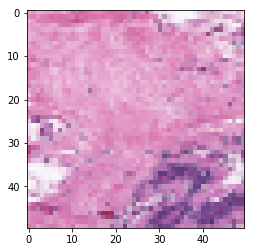

In [65]:
img=npimg.imread("images/0/10253_idx5_x1001_y1001_class0.png")
imgplot=plt.imshow(img)
plt.show()

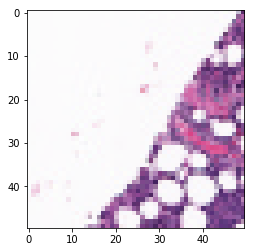

In [67]:
img=npimg.imread("images/1/10253_idx5_x551_y301_class1.png")
imgplot=plt.imshow(img)
plt.show()

In [77]:
%%bash
wget https://raw.githubusercontent.com/apache/incubator-mxnet/master/tools/im2rec.py
chmod +x im2rec.py

--2020-04-02 18:26:24--  https://raw.githubusercontent.com/apache/incubator-mxnet/master/tools/im2rec.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.24.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.24.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15838 (15K) [text/plain]
Saving to: ‘im2rec.py’

     0K .......... .....                                      100%  528K=0.03s

2020-04-02 18:26:24 (528 KB/s) - ‘im2rec.py’ saved [15838/15838]



In [75]:
#USING MXNET im2rec to build image record on list

In [82]:
%%bash
python im2rec.py --list --recursive --train-ratio 0.7 --test-ratio 0.3 images images/

0 0
1 1


In [85]:
#Building the record 

In [83]:
%%bash 
python im2rec.py --num-thread 4 --pass-through images_train.lst images
python im2rec.py --num-thread 4 --pass-through images_test.lst images


Creating .rec file from /home/ec2-user/SageMaker/images_train.lst in /home/ec2-user/SageMaker
time: 0.005006313323974609  count: 0
time: 0.1935877799987793  count: 1000
time: 0.18250536918640137  count: 2000
time: 0.20971465110778809  count: 3000
time: 0.20089387893676758  count: 4000
time: 0.19986534118652344  count: 5000
time: 0.19398927688598633  count: 6000
time: 0.18868589401245117  count: 7000
time: 0.19535446166992188  count: 8000
time: 0.21479153633117676  count: 9000
time: 0.29809069633483887  count: 10000
time: 0.341418981552124  count: 11000
time: 0.29649806022644043  count: 12000
time: 0.29129528999328613  count: 13000
time: 0.29328465461730957  count: 14000
time: 0.2894918918609619  count: 15000
time: 0.2959749698638916  count: 16000
time: 0.28088951110839844  count: 17000
time: 0.2947711944580078  count: 18000
time: 0.302020788192749  count: 19000
time: 0.2999095916748047  count: 20000
time: 0.296628475189209  count: 21000
time: 0.3401026725769043  count: 22000
time: 0.31

In [ ]:
#uploadigg the record to the s3 bucket for the pipe mode

In [84]:
%%bash

aws s3 cp images_train.rec s3://sagemaker-data-iamrahulinc/breast-cancer-detection/input/recordio/train
aws s3 cp images_test.rec s3://sagemaker-data-iamrahulinc/breast-cancer-detection/input/recordio/test


upload: ./images_train.rec to s3://sagemaker-data-iamrahulinc/breast-cancer-detection/input/recordio/train
upload: ./images_test.rec to s3://sagemaker-data-iamrahulinc/breast-cancer-detection/input/recordio/test
